In [4]:
using HiddenMarkovModels
using DriftDiffusionModels
using Plots
using LinearAlgebra

In [2]:
# Create a true HMMDDM
true_trans = [0.9 0.1; 0.2 0.8]
true_init = [0.99, 0.01]

B_1 = 12
v1 = 1.25
a_0 = 0.0

B_2 = 2
v1 = 2.0
a_0 = -0.5

DDM1 = DriftDiffusionModel(B_1, v1, a_0, 1.0)
DDM2 = DriftDiffusionModel(B_2, v1, a_0, 1.0)

dists_true = [DDM1, DDM2]

hmm = HMM(true_init, true_trans, dists_true)

# sample from the true model
state_seq_true, obs_seq_true = rand(hmm, 10000)

(state_seq = [1, 1, 2, 2, 2, 1, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], obs_seq = DDMResult[DDMResult(4.739901917314566, -1), DDMResult(5.848817295092629, -1), DDMResult(2.414627984468122, -1), DDMResult(0.8023387119218285, -1), DDMResult(1.2021312314062726, 1), DDMResult(7.271820829792102, -1), DDMResult(0.6018247106301382, -1), DDMResult(1.3897078172077617, -1), DDMResult(0.2753328794361415, -1), DDMResult(0.7317072780899959, 1)  …  DDMResult(4.491485855470445, -1), DDMResult(6.3701880437527345, -1), DDMResult(5.488958513983828, -1), DDMResult(7.360866446615517, -1), DDMResult(6.2504842142151995, -1), DDMResult(4.988500925569744, -1), DDMResult(9.103183608404283, -1), DDMResult(5.951589087869745, 1), DDMResult(6.793651595586886, 1), DDMResult(6.111435708168361, -1)])

In [6]:
# fit a naive hmm to the data
trans_guess = [0.95 0.05; 0.05 0.95]
init_guess = [0.5, 0.5]

B_1_guess = 10
v1_guess = 1.0
a_0_guess = 0.0

B_2_guess = 1
v2_guess = 1.0
a_0_guess = 0.0

DDM1_guess = DriftDiffusionModel(B_1_guess, v1_guess, a_0_guess, 1.0)
DDM2_guess = DriftDiffusionModel(B_2_guess, v2_guess, a_0_guess, 1.0)

dists_guess = [DDM1_guess, DDM2_guess]

# create some priors
α₀ = ones(2)
αₜ = ones(2, 2)
αₜ[diagind(αₜ)] .= 2.0

hmm_guess = PriorHMM(init_guess, trans_guess, dists_guess, αₜ, α₀)

hmm_est, lls = baum_welch(hmm_guess, obs_seq_true; loglikelihood_increasing=false)

(PriorHMM{Float64, DriftDiffusionModel}([1.0, 1.7733333246680472e-26], [0.9021967590666614 0.0978032409333385; 0.2103294275407252 0.7896705724592749], DriftDiffusionModel[DriftDiffusionModel(11.97600172083112, 2.0055089298221507, -0.46715202508732784, 1.0), DriftDiffusionModel(2.0373220474104468, 2.025988326260897, -0.5476544130550647, 1.0)], [2.0 1.0; 1.0 2.0], [1.0, 1.0]), [-26919.652315140862, -16378.365164223198, -15958.908478108555, -15758.689711290392, -15744.315641883582, -15744.154885948643, -15744.153602928985, -15744.153592962135])

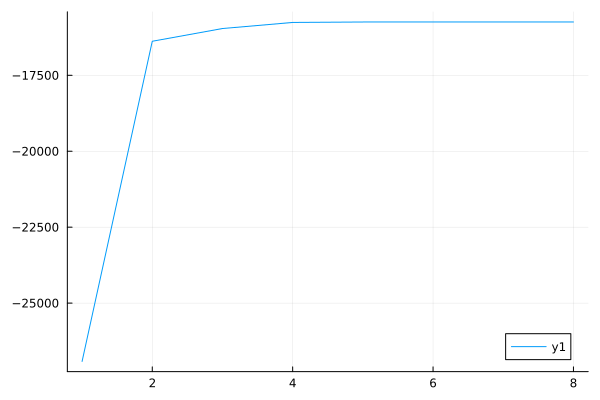

In [7]:
plot(lls)

In [8]:
posterior = forward(hmm_est, obs_seq_true)

([1.0 0.9999985406689202 … 0.9999974714147134 0.999999105296924; 3.380484732893747e-30 1.4593310797804266e-6 … 2.528585286714459e-6 8.947030759738733e-7], [-15745.20082518239])

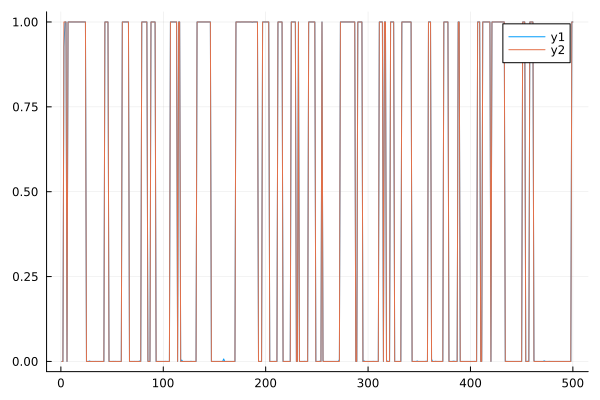

In [9]:
plot(posterior[1]'[1:500, 2])
plot!(state_seq_true[1:500] .- 1)